# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [487]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [488]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [489]:
x_train[0].shape

(28, 28)

Check the sample train data

In [490]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

Check the corresponding label in the training set

In [491]:

y_train[333]

8

Check the actual image

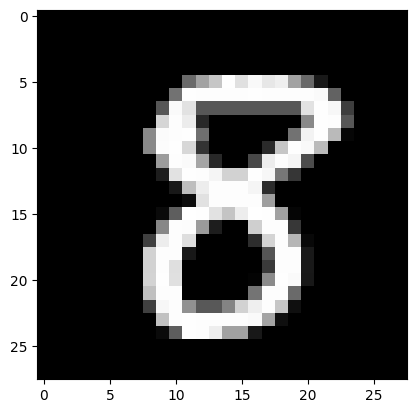

In [492]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [493]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [494]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [495]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [496]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [497]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 512)               401920    
                                                                 
 dropout_70 (Dropout)        (None, 512)               0         
                                                                 
 dense_106 (Dense)           (None, 512)               262656    
                                                                 
 dropout_71 (Dropout)        (None, 512)               0         
                                                                 
 dense_107 (Dense)           (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [498]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 6s 10ms/step - loss: 0.2542 - accuracy: 0.9213 - val_loss: 0.1102 - val_accuracy: 0.9653
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1046 - accuracy: 0.9681 - val_loss: 0.0968 - val_accuracy: 0.9713
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0738 - accuracy: 0.9765 - val_loss: 0.0643 - val_accuracy: 0.9793
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.0602 - val_accuracy: 0.9827
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0693 - val_accuracy: 0.9809
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0645 - val_accuracy: 0.9819
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0568 - val_accuracy: 0.9842
Epoch

Use Keras evaluate function to evaluate performance on the test set

In [499]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09334143251180649
Test accuracy: 0.9858999848365784


Interpret the result

#type your answer here

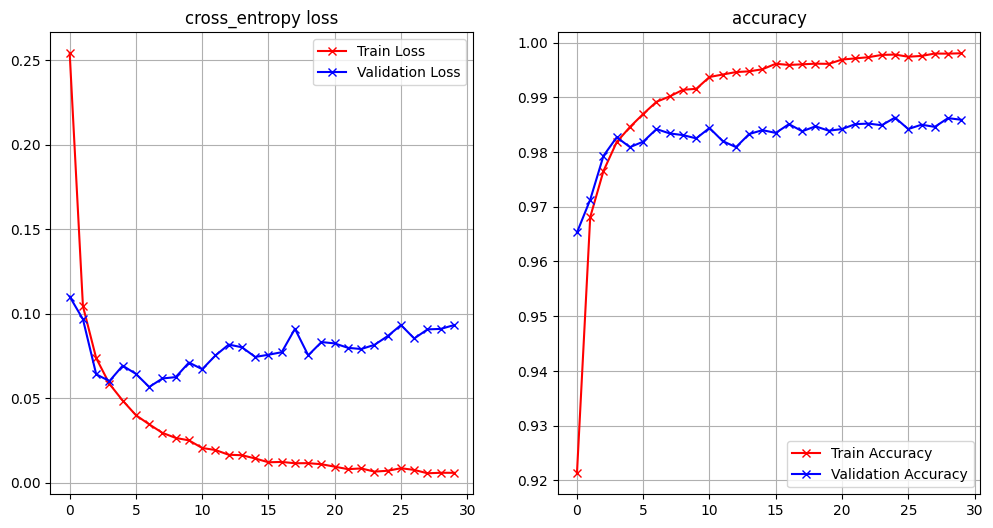

In [500]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

#type your answer here

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [611]:
import pandas as pd

apple = pd.read_csv(r'C:\Users\maria\Downloads\apple_quality.csv')

In [612]:
apple.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [613]:
apple.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [614]:
apple = apple.dropna()
apple.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [615]:
apple.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [616]:
apple['Acidity'] = apple['Acidity'].astype(float)

In [617]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

apple.Quality = label_encoder.fit_transform(apple.Quality)

In [618]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

apple.iloc[:, :-1] = scaler.fit_transform(apple.iloc[:, :-1])

In [619]:
X = apple.iloc[:, :-1]
y = apple.iloc[:, -1]


In [620]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=41,
                                                    shuffle=True)

In [621]:
print(x_train.shape, 'x_train samples')
print(x_test.shape, 'x_test samples')
print(y_train.shape, 'y_train samples')
print(y_test.shape, 'y_test samples')

(3200, 8) x_train samples
(800, 8) x_test samples
(3200,) y_train samples
(800,) y_test samples


In [622]:
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(8,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(1, activation='sigmoid'))

In [623]:
model_1.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_141 (Dense)           (None, 400)               3600      
                                                                 
 dropout_94 (Dropout)        (None, 400)               0         
                                                                 
 dense_142 (Dense)           (None, 300)               120300    
                                                                 
 dropout_95 (Dropout)        (None, 300)               0         
                                                                 
 dense_143 (Dense)           (None, 1)                 301       
                                                                 
Total params: 124201 (485.16 KB)
Trainable params: 124201 (485.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [624]:
learning_rate = .001
model_1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history_model1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
25/25 [==============================] - 1s 13ms/step - loss: 0.4975 - accuracy: 0.7725 - val_loss: 0.3993 - val_accuracy: 0.8263
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3850 - accuracy: 0.8247 - val_loss: 0.3468 - val_accuracy: 0.8487
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3375 - accuracy: 0.8438 - val_loss: 0.3195 - val_accuracy: 0.8512
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3210 - accuracy: 0.8556 - val_loss: 0.3253 - val_accuracy: 0.8512
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3166 - accuracy: 0.8547 - val_loss: 0.3056 - val_accuracy: 0.8575
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3062 - accuracy: 0.8662 - val_loss: 0.3022 - val_accuracy: 0.8700
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.2954 - accuracy: 0.8666 - val_loss: 0.2942 - val_accuracy: 0.8700
Epoch 8/20
25/25 [=

In [625]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2580055594444275
Test accuracy: 0.8924999833106995


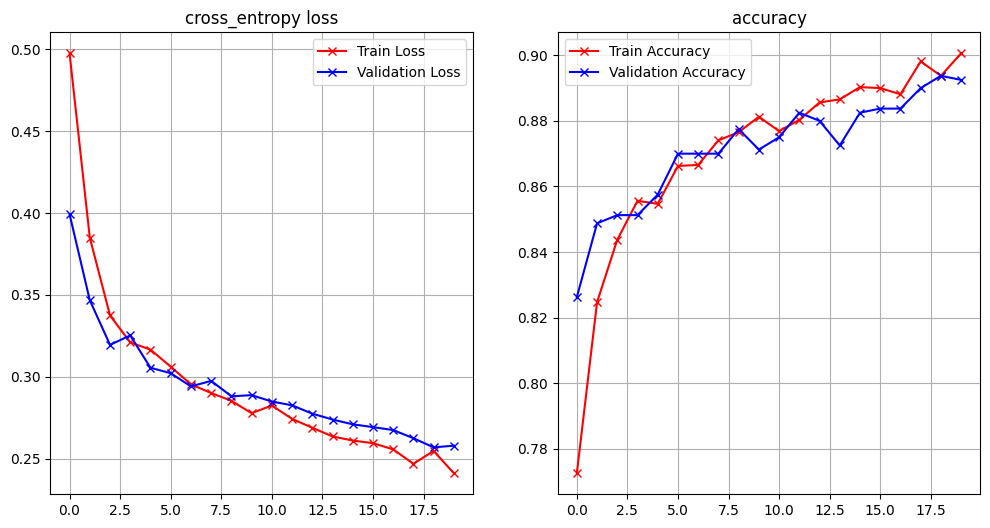

In [626]:
plot_loss_accuracy(history_model1)

In [627]:
model_2 = Sequential()
model_2.add(Dense(100, activation='relu', input_shape=(8,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(200, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(1, activation='sigmoid'))

In [628]:
model_2.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 100)               900       
                                                                 
 dropout_96 (Dropout)        (None, 100)               0         
                                                                 
 dense_145 (Dense)           (None, 200)               20200     
                                                                 
 dropout_97 (Dropout)        (None, 200)               0         
                                                                 
 dense_146 (Dense)           (None, 1)                 201       
                                                                 
Total params: 21301 (83.21 KB)
Trainable params: 21301 (83.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [629]:
learning_rate = .001
model_2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 50  # mini-batch with 128 examples
epochs = 120
history_model2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/120
64/64 [==============================] - 1s 6ms/step - loss: 0.5450 - accuracy: 0.7294 - val_loss: 0.4387 - val_accuracy: 0.7937
Epoch 2/120
64/64 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.7891 - val_loss: 0.3795 - val_accuracy: 0.8275
Epoch 3/120
64/64 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8188 - val_loss: 0.3480 - val_accuracy: 0.8413
Epoch 4/120
64/64 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8219 - val_loss: 0.3363 - val_accuracy: 0.8462
Epoch 5/120
64/64 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8391 - val_loss: 0.3178 - val_accuracy: 0.8575
Epoch 6/120
64/64 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8466 - val_loss: 0.3134 - val_accuracy: 0.8587
Epoch 7/120
64/64 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8531 - val_loss: 0.3105 - val_accuracy: 0.8650
Epoch 8/120
6

In [630]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15596123039722443
Test accuracy: 0.9512500166893005


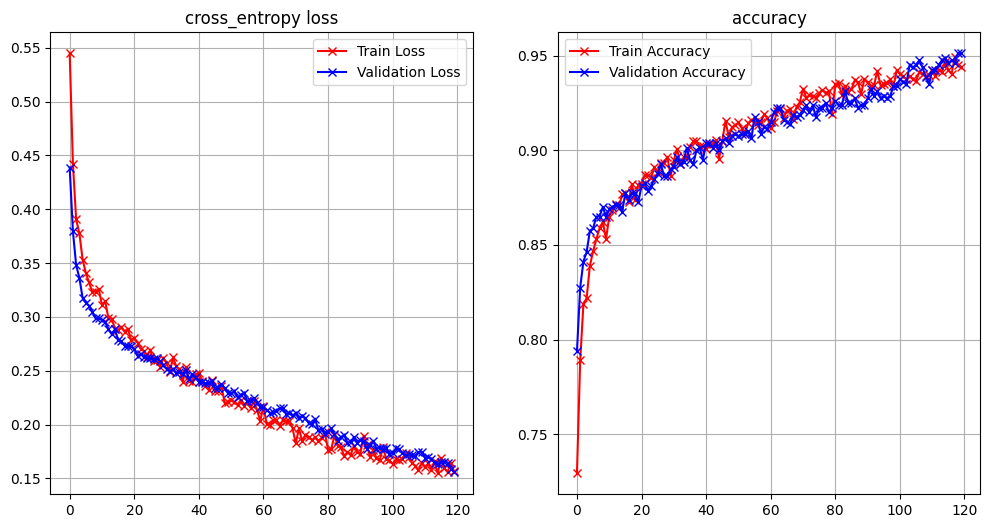

In [631]:
plot_loss_accuracy(history_model2)

#### Conclusion

#type your answer here